<a href="https://colab.research.google.com/github/danisotoguerrero/Clasificador-zonas-seg-n-el-peligroClasificador-zonas-segun-el-peligro/blob/main/Laboratorio_3_Grupo_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
# Importamos las bibliotecas que sabemos que vamos a usar
%matplotlib inline

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from numpy import random, float, array

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, MeanShift, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score, silhouette_score

from scipy.cluster.hierarchy import dendrogram, linkage

<ipython-input-113-7fbb640c2022>:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from numpy import random, float, array


In [114]:
# Para leer datos de Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:
# Path de la carpeta donde tenemos los datos ---> Solo hay que cambiar esta parte
folder = "/content/drive/MyDrive/UNI/"

In [116]:
# Carga de datos
df = pd.read_csv(folder + "Crimenes.csv")
df.head()

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [117]:
#group by city
grouped=df.groupby(by=['Estado']).sum()

<Axes: ylabel='Estado'>

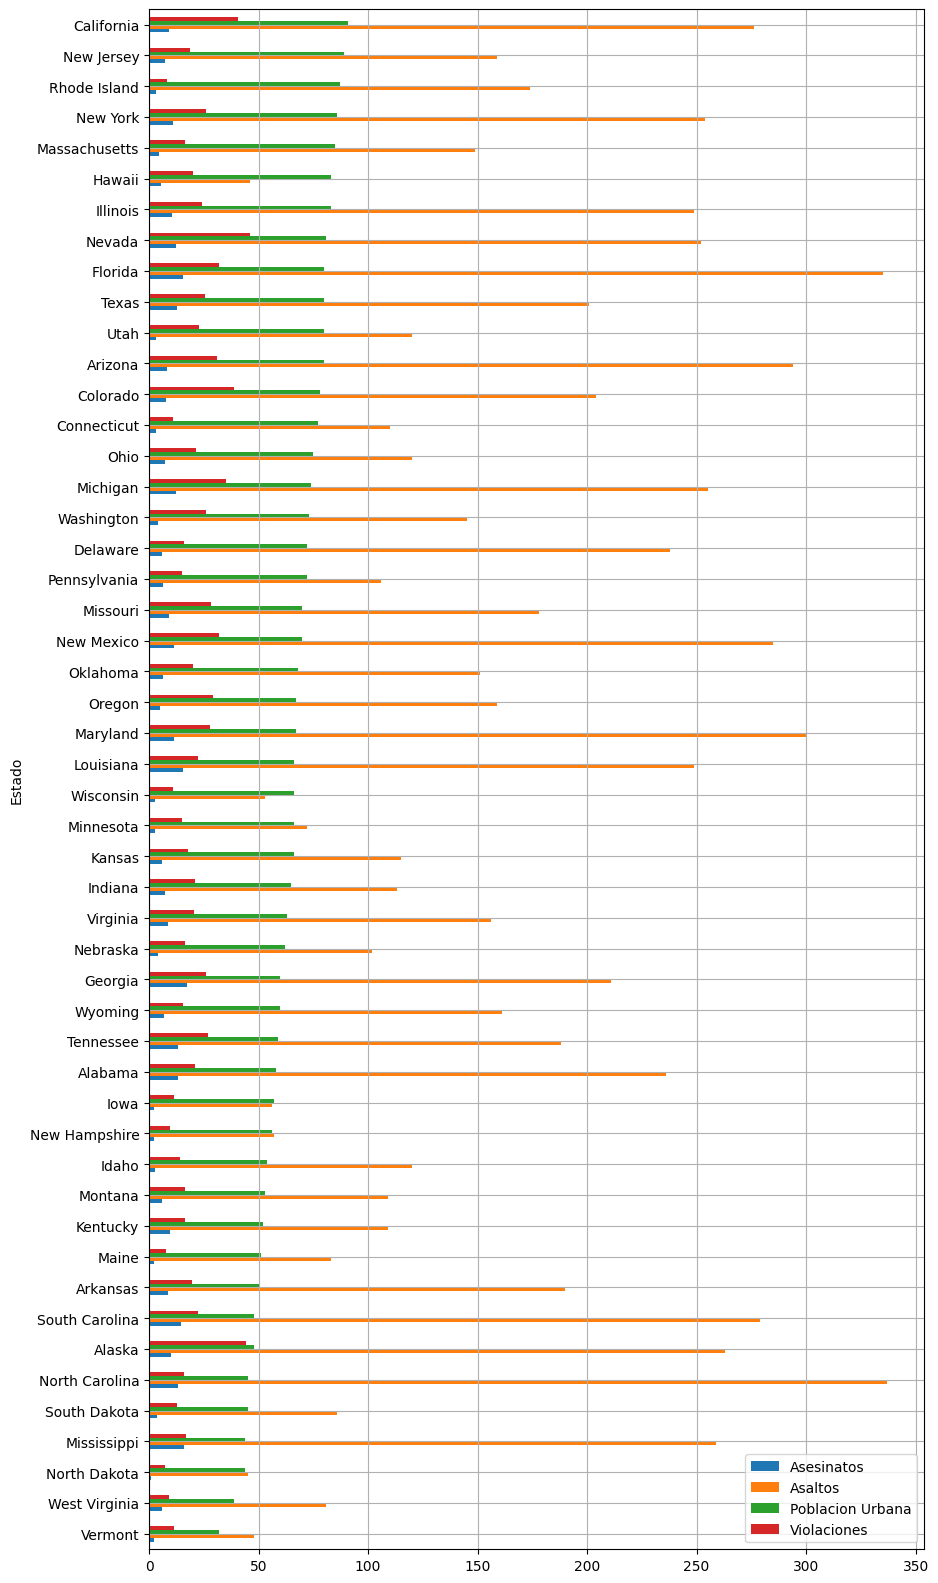

In [118]:
#cities with crime stats sorted by decending urban population
features_of_interest=pd.DataFrame({'Asesinatos': grouped['Asesinatos'],
                                     'Asaltos': grouped['Asaltos'],
                                     'Poblacion Urbana': grouped['Poblacion Urbana'],
                                     'Violaciones': grouped['Violaciones'],
                                    }
                                   )

features_of_interest.sort_values(by='Poblacion Urbana',ascending=True).plot.barh(figsize=(10,20), grid=True)

In [119]:
X = df[['Asesinatos', 'Asaltos', 'Violaciones', 'Poblacion Urbana']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform( X )
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X_scaled )
  cluster_errors.append( clusters.inertia_ )

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

,num_clusters,cluster_errors
0,1,200.000000
1,2,104.961633
2,3,79.921703
3,4,57.554259
4,5,50.051197
5,6,43.982477
6,7,41.615652
7,8,35.847187
8,9,31.968402
9,10,27.986377


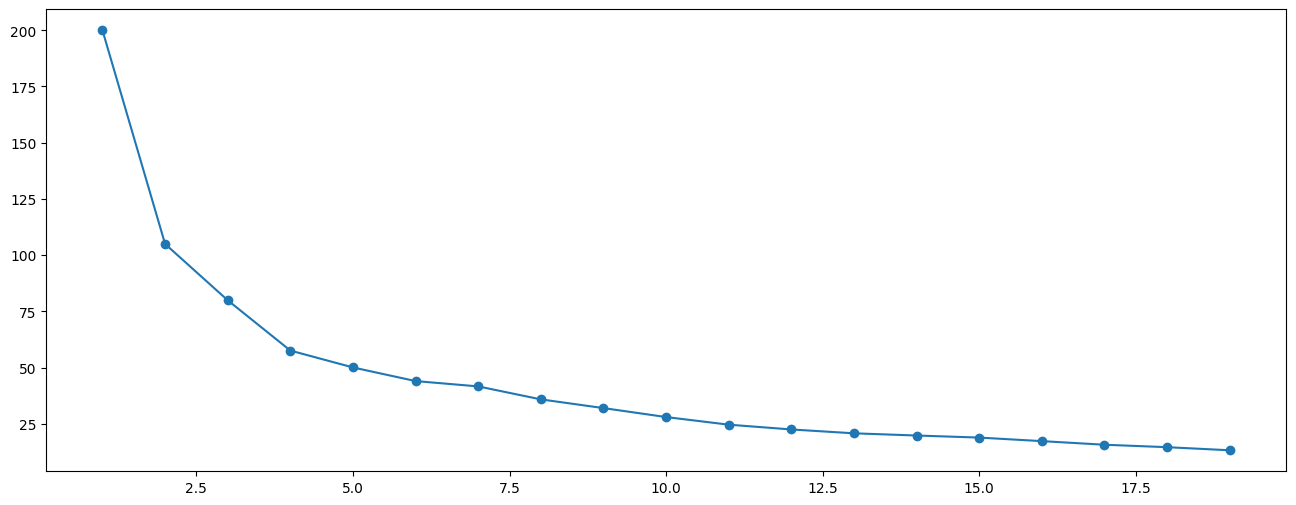

In [120]:
plt.figure(figsize=(16,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );

In [121]:
X = df[['Asesinatos', 'Asaltos', 'Violaciones', 'Poblacion Urbana']]

clusters = KMeans(4)  # 4 clusters!
clusters.fit( X )
clusters.cluster_centers_
clusters.labels_

df['Crime_clusters'] = clusters.labels_
df.head()
df.sort_values(by=['Crime_clusters'],ascending = True)
X.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Asesinatos,Asaltos,Violaciones,Poblacion Urbana
0,13.2,236,21.2,58
1,10.0,263,44.5,48
2,8.1,294,31.0,80
3,8.8,190,19.5,50
4,9.0,276,40.6,91


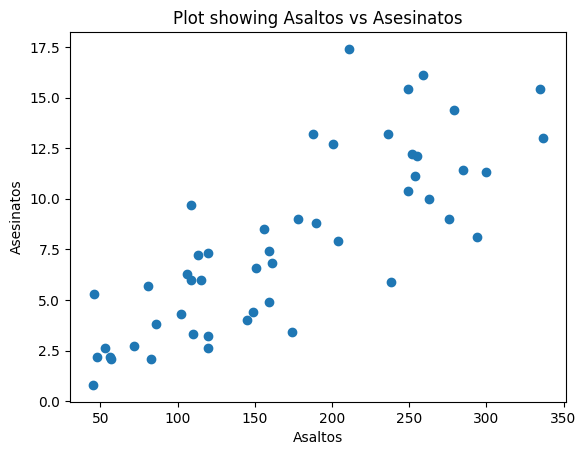

In [122]:
#plot with Asaltos vs murder
fig,ax=plt.subplots()
plt.scatter(df['Asaltos'], df['Asesinatos'])
plt.xlabel('Asaltos')
plt.ylabel('Asesinatos')
plt.title('Plot showing Asaltos vs Asesinatos')
plt.show()

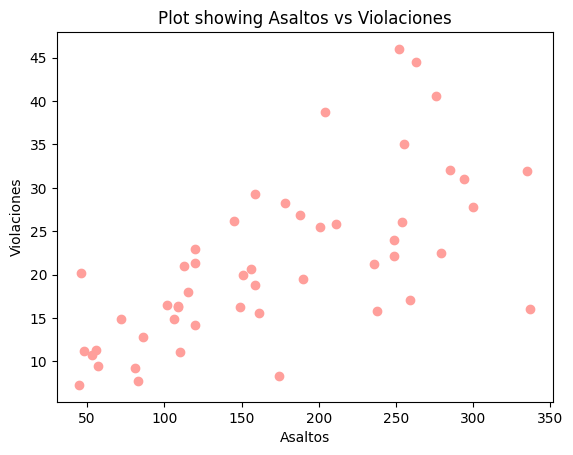

In [123]:
#plot showing no. Asaltos vs no. Violaciones
fig,ax=plt.subplots()
plt.scatter(df['Asaltos'], df['Violaciones'], color='r')
plt.xlabel('Asaltos')
plt.ylabel('Violaciones')
plt.title('Plot showing Asaltos vs Violaciones')
plt.show()

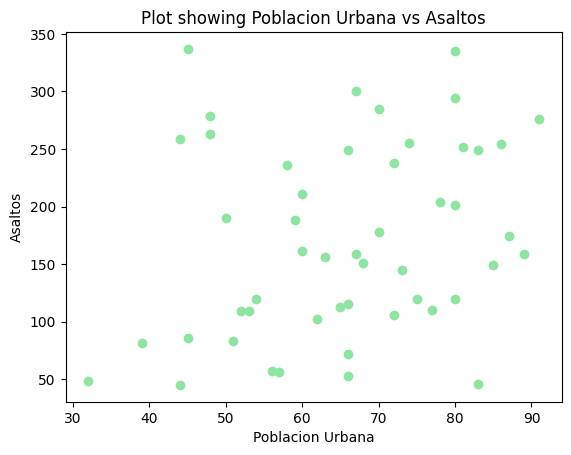

In [124]:
#more assaults the more violent crimes
#plot showing urban pop vs no of Asaltos
fig,ax=plt.subplots()
plt.scatter(df['Poblacion Urbana'], df['Asaltos'], color='g')
plt.xlabel('Poblacion Urbana')
plt.ylabel('Asaltos')
plt.title('Plot showing Poblacion Urbana vs Asaltos')
plt.show()

<Axes: ylabel='Estado'>

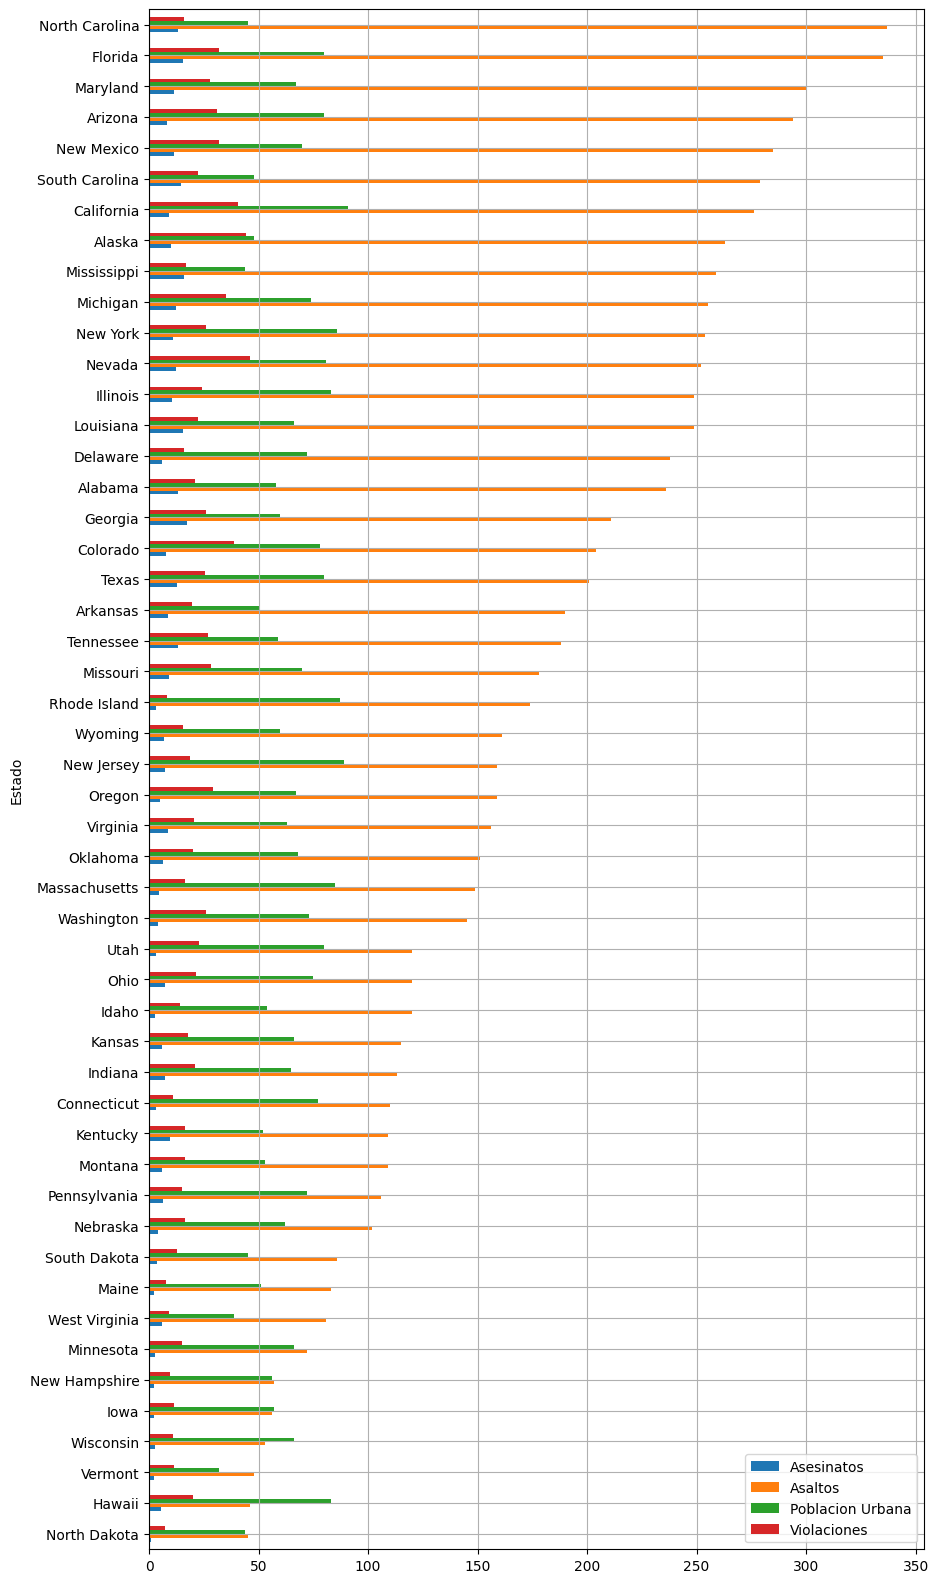

In [125]:
#less correlated as some with low urban populations have high no. Asaltos
#revisualisation of cities with all crime states, this time organised by number of Asaltos

features_of_interest.sort_values(by='Asaltos', ascending=True).plot.barh(figsize=(10,20),
                                                                         grid=True)


In [126]:
#data exploration table
#row values
variable_list=list(df.columns[1:])

#mean value calculation for rows (variables)
mean_list=[]
for n in variable_list:
    mean_=df[n].mean()
    mean_list.append(mean_)

#standard deviation value calc
stDev_list=[]
for n in variable_list:
    stDev=df[n].std()
    stDev_list.append(stDev)

#find min value
min_list=[]
for n in variable_list:
    min_=df[n].min()
    min_list.append(min_)

#find max value
max_list=[]
for n in variable_list:
    max_=df[n].max()
    max_list.append(max_)

#create and fill table
exploration_table=pd.DataFrame(columns=['Variable', 'Mean', 'StandardDeviation', 'Min', 'Max'])
exploration_table['Variable']=variable_list
exploration_table['Mean']=mean_list
exploration_table['StandardDeviation']=stDev_list
exploration_table['Min']=min_list
exploration_table['Max']=max_list

exploration_table

,Variable,Mean,StandardDeviation,Min,Max
0,Asesinatos,7.788,4.355510,0.8,17.4
1,Asaltos,170.760,83.337661,45.0,337.0
2,Poblacion Urbana,65.540,14.474763,32.0,91.0
3,Violaciones,21.232,9.366385,7.3,46.0
4,Crime_clusters,1.360,1.138563,0.0,3.0


In [127]:
#define and scale data
X=df[['Asesinatos', 'Asaltos', 'Poblacion Urbana', 'Violaciones']].values.reshape(-1,4)
print('Shape of data:' , X.shape)

X_sc=StandardScaler().fit_transform(X)

Shape of data: (50, 4)


<ipython-input-128-405bf7b23207>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrs=df.corr()


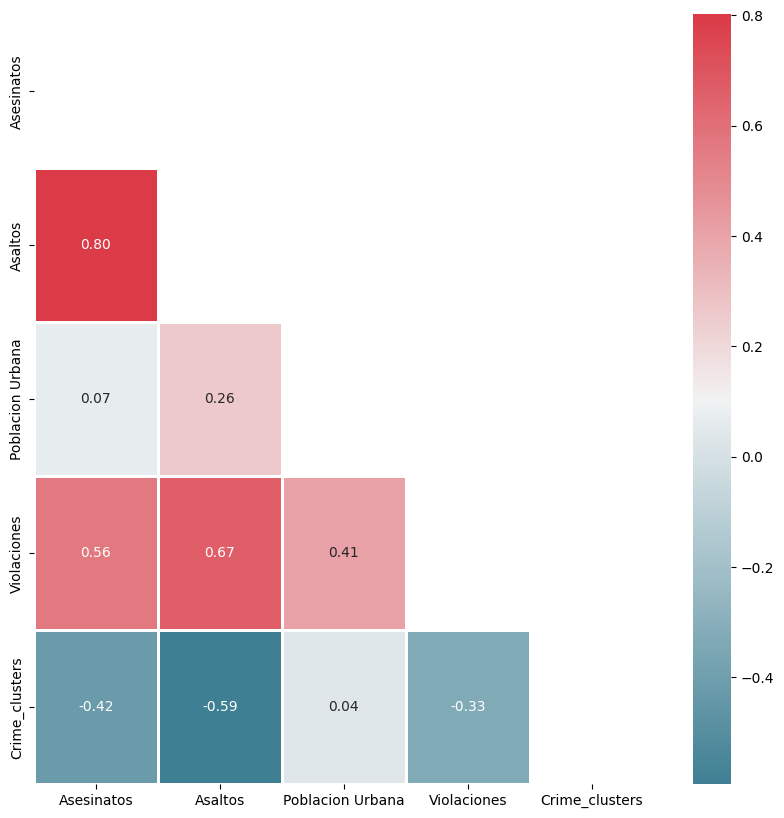

In [128]:
#correlation heatmap
colormap=sns.diverging_palette(220, 10, as_cmap=True)

def corr_heatmap(df):
    corrs=df.corr()
    fig,ax=plt.subplots(figsize=(10,10))
    #maskl mirrored side
    dropSelf=np.zeros_like(corrs)
    dropSelf[np.triu_indices_from(dropSelf)]=True
    ax=sns.heatmap(corrs, cmap=colormap, annot=True,
                   fmt='.2f', mask=dropSelf, linewidth=2)

corr_heatmap(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

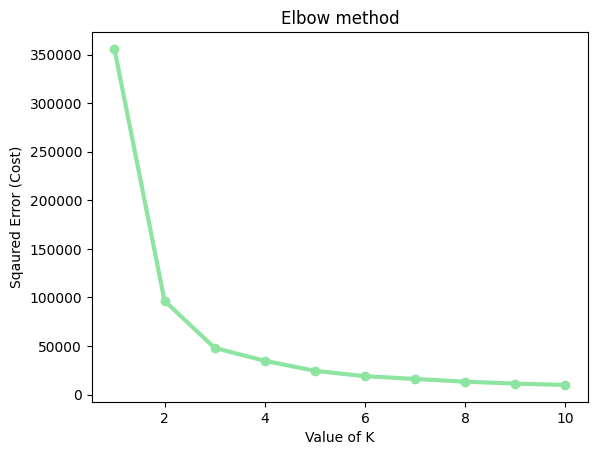

In [129]:
#elbow plot to determine optimal k value
cost=[]
for i in range(1, 11):
    KM=KMeans(n_clusters=i, max_iter=500)
    KM.fit(X)

    # calculates squared error
    # for the clustered points
    cost.append(KM.inertia_)

# plot the cost against K values
plt.plot(range(1, 11), cost, color='g', linewidth='3', marker='o')
plt.xlabel("Value of K")
plt.ylabel("Sqaured Error (Cost)")
plt.title('Elbow method')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


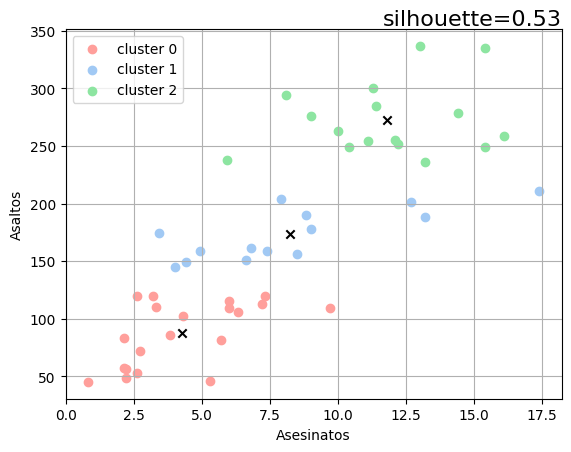

In [130]:
#k-means clustering into 3 clusters
from sklearn.cluster import KMeans

def Kmeans_plot(x, k=3, r=123):
    kmeans=KMeans(n_clusters=k, init='k-means++', random_state=r)
    y_pred=kmeans.fit_predict(x)
    colors='rbgcmy'
    for c in range(k):
        plt.scatter(x[y_pred==c,0], x[y_pred==c,1], c=colors[c],
                    label='cluster {}'.format(c))
        plt.scatter(kmeans.cluster_centers_[c,0], kmeans.cluster_centers_[c,1],
                   marker='x', color='black')

    score=round(silhouette_score(x, kmeans.labels_, metric='euclidean'),2)
    plt.title('silhouette={}'.format(score), loc='right', fontdict={'fontsize': 16}, pad=-14)
    plt.xlabel('Asesinatos')
    plt.ylabel('Asaltos')
    plt.legend()
    plt.grid()
    plt.show()

Kmeans_plot(X, k=3, r=0)


In [131]:
variables_correlation = df[['Asesinatos', 'Asaltos', 'Violaciones', 'Poblacion Urbana']]
variables_correlation.corr()

,Asesinatos,Asaltos,Violaciones,Poblacion Urbana
Asesinatos,1.000000,0.801873,0.563579,0.069573
Asaltos,0.801873,1.000000,0.665241,0.258872
Violaciones,0.563579,0.665241,1.000000,0.411341
Poblacion Urbana,0.069573,0.258872,0.411341,1.000000


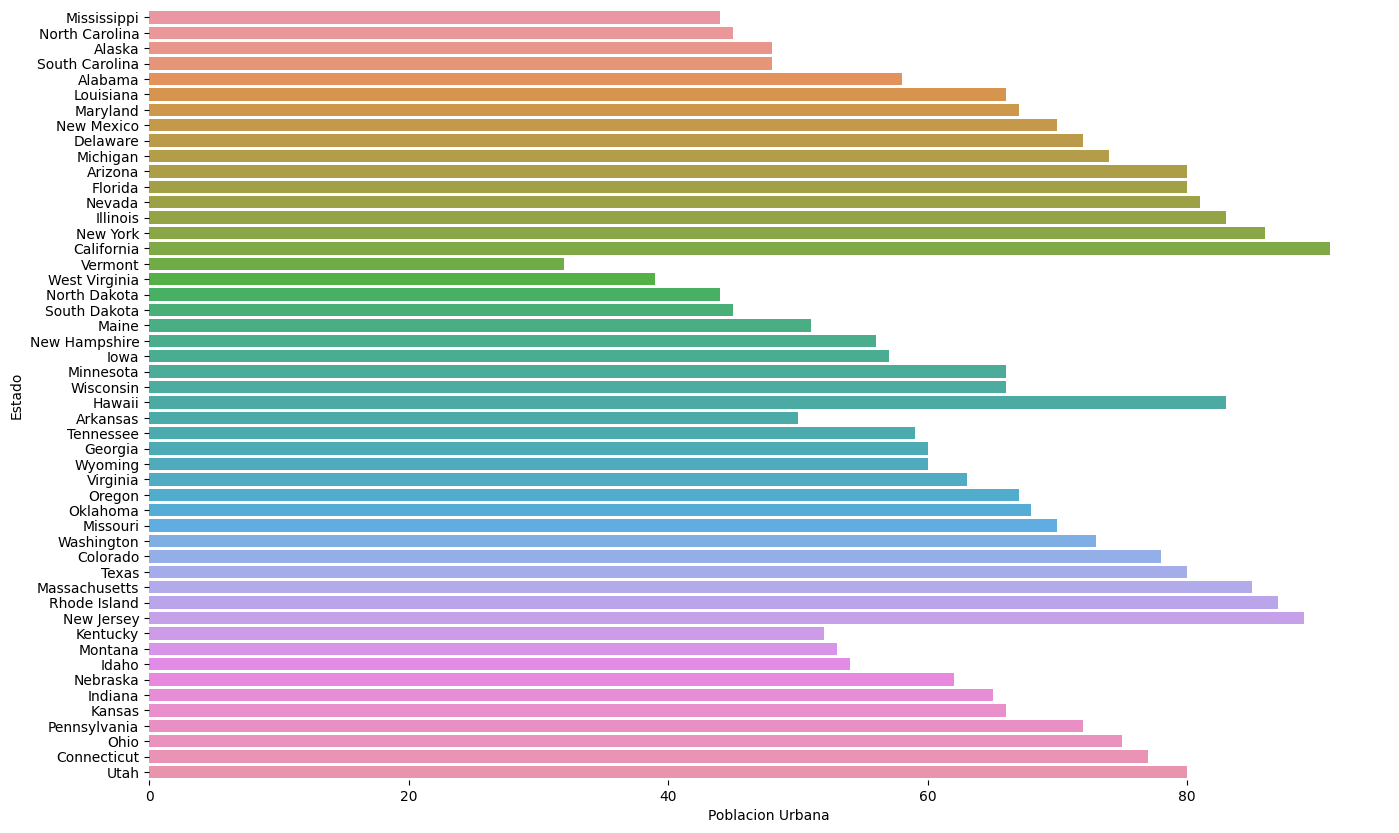

In [132]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(16, 10))

# Load the dataset
stats = df.sort_values([ "Crime_clusters", "Poblacion Urbana"], ascending=True)
sns.set_color_codes("pastel")
sns.barplot(y="Estado", x="Poblacion Urbana", data=stats)

sns.despine(left=True, bottom=True)

## Conclusión
Aca va el texto